<a href="https://colab.research.google.com/github/Anam2291/Deep_Learning_Projects/blob/main/Cat_Vs_Dog_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/



In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:48<00:00, 23.8MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.4MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [5]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [7]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_ds,epochs=20,validation_data=validation_ds)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 85ms/step - accuracy: 0.5613 - loss: 3.3924 - val_accuracy: 0.6204 - val_loss: 0.6712
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 85ms/step - accuracy: 0.6606 - loss: 0.6298 - val_accuracy: 0.7384 - val_loss: 0.5380
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 79ms/step - accuracy: 0.7298 - loss: 0.5410 - val_accuracy: 0.7586 - val_loss: 0.5010
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 81ms/step - accuracy: 0.7681 - loss: 0.4926 - val_accuracy: 0.7884 - val_loss: 0.4662
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 81ms/step - accuracy: 0.8096 - loss: 0.4172 - val_accuracy: 0.7872 - val_loss: 0.4837
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.8397 - loss: 0.3605 - val_accuracy: 0.8030 - val_loss: 0.4299
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.8658 - loss: 0.3073 - val_accuracy: 0.7398 - val_loss: 0.5922
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.8984 - loss: 0.2435 - 

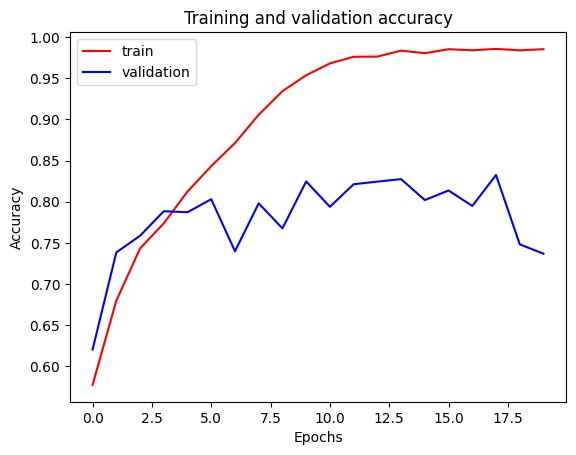

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()


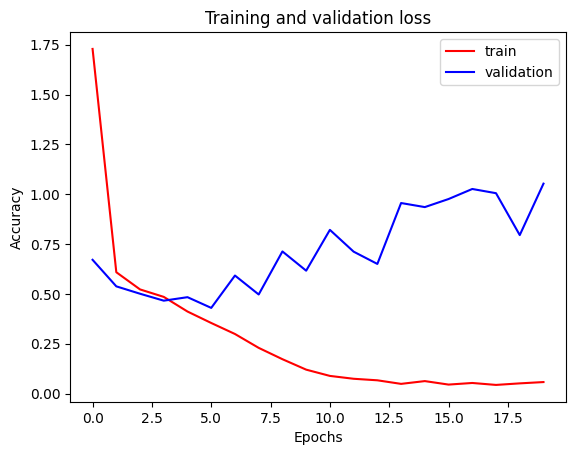

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [13]:
!wget -O sample_image.jpg "https://cdn.mos.cms.futurecdn.net/yzV5i2F35i9RozwSeFLPJV-1200-80.jpg"


--2025-01-09 04:30:54--  https://cdn.mos.cms.futurecdn.net/yzV5i2F35i9RozwSeFLPJV-1200-80.jpg
Resolving cdn.mos.cms.futurecdn.net (cdn.mos.cms.futurecdn.net)... 108.156.144.13, 108.156.144.86, 108.156.144.94, ...
Connecting to cdn.mos.cms.futurecdn.net (cdn.mos.cms.futurecdn.net)|108.156.144.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84164 (82K) [image/jpeg]
Saving to: ‘sample_image.jpg’

sample_image.jpg    100%[===================>]  82.19K  --.-KB/s    in 0.003s  

2025-01-09 04:30:54 (30.1 MB/s) - ‘sample_image.jpg’ saved [84164/84164]



In [14]:
!ls


dogs_vs_cats  dogs-vs-cats.zip	kaggle.json  sample_data  sample_image.jpg  test  train


In [15]:
import cv2

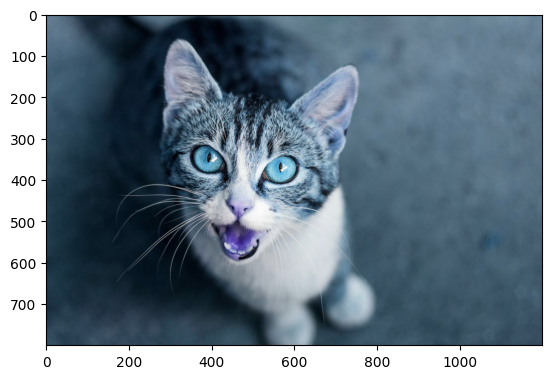

In [16]:
test_img = cv2.imread('/content/sample_image.jpg')
plt.imshow(test_img)
plt.show()

In [17]:
test_img.shape

(800, 1200, 3)

In [18]:
test_img = cv2.resize(test_img,(256,256))

In [19]:
test_input = test_img.reshape((1,256,256,3))

In [20]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 905ms/step


array([[0.]], dtype=float32)

In [28]:
!wget -O sample_image2.jpg "https://hips.hearstapps.com/hmg-prod/images/golden-retriever-royalty-free-image-506756303-1560962726.jpg?crop=1xw:0.84375xh;center,top&resize=1200:*"

--2025-01-09 04:31:38--  https://hips.hearstapps.com/hmg-prod/images/golden-retriever-royalty-free-image-506756303-1560962726.jpg?crop=1xw:0.84375xh;center,top&resize=1200:*
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 148918 (145K) [image/jpeg]
Saving to: ‘sample_image2.jpg’

sample_image2.jpg   100%[===================>] 145.43K  --.-KB/s    in 0.004s  

2025-01-09 04:31:38 (36.6 MB/s) - ‘sample_image2.jpg’ saved [148918/148918]



In [29]:
!ls

dogs_vs_cats	  kaggle.json  sample_image2.jpg  test
dogs-vs-cats.zip  sample_data  sample_image.jpg   train


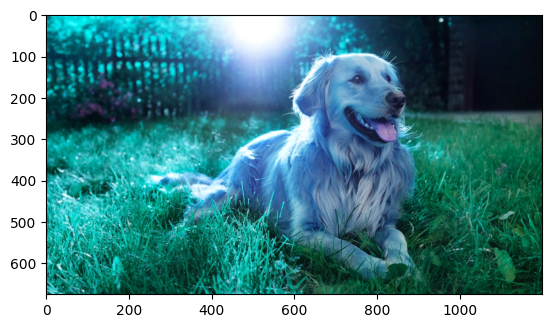

In [30]:
import cv2
test_img2 = cv2.imread('/content/sample_image2.jpg')
plt.imshow(test_img2)
plt.show()


In [31]:
test_img2.shape

(675, 1200, 3)

In [32]:
test_img2 = cv2.resize(test_img2,(256,256))

In [33]:
test_input2 = test_img2.reshape((1,256,256,3))

In [34]:
model.predict(test_input2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[1.]], dtype=float32)